In [215]:
import numpy as np
from PIL import ImageFilter, Image
from skimage import transform
import imageio

# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# plot inside notebook
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

        # set number of nodes in each layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate   
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j. where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) 
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, target_list):
        
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layers error is the out_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs *(1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs *(1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        
        # covert input list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs        
        
        pass
    

In [377]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learining rate is 0.3
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# load the mnist training data csv into list
training_data_file = open("/Users/jonas/Desktop/neural_network/strom_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of thimes the training data set is used for training
epochs = 4000

for e in range(epochs):
    
    # go through all records in the training_data_list
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99 ) + 0.01
        # create the target output values (all 0.001 expect the desired value which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [378]:
# load test data
test_data_file = open("/Users/jonas/Desktop/neural_network/strom_train.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# test the neural network
# scorecard
scorecard = []

# go through all records in the test_data_list
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99 ) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's anwer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass


In [379]:
# calculate the performance score, the frction of correct answers
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  1.0


In [57]:
#image_array = np.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

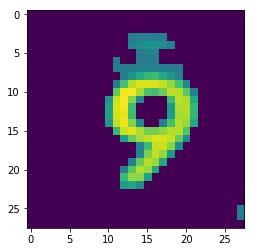

In [428]:
from skimage import transform,io
import imageio
img_array = imageio.imread("/Users/jonas/Desktop/neural_network/test_images/tmp5.png", as_gray=True)
img_array = transform.resize(img_array,(28,28), anti_aliasing=True)
img_array = img_array.astype(int)
#matplotlib.pyplot.imshow(img_array, cmap='Greys')
#matplotlib.pyplot.imshow(img_array)
tmp = img_array.reshape(784)
idx=0
for x in tmp:
    if x < 50.0:
        tmp[idx] = 0.0
        pass
    idx += 1
    pass
#print(tmp)
matplotlib.pyplot.imshow(tmp.reshape((28,28)))
#img_data = 255.0 - tmp
img_data = (tmp / 255.0 * 0.99) + 0.01
#print(img_data)

In [429]:
#print(n.query(img_data))
print("Das neuronale Netz hat zu ",np.round(np.max(n.query(img_data)),2)*100,"% folgende Zahl erkannt: ", np.argmax(n.query(img_data)))

Das neuronale Netz hat zu  70.0 % folgende Zahl erkannt:  9


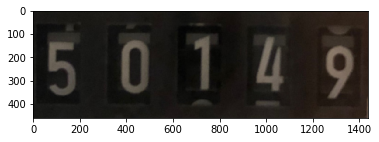

In [418]:
path = "/Users/jonas/Desktop/neural_network/test_images/pic6.png"
outputPath = "/Users/jonas/Desktop/neural_network/test_images/prepImg.png"

def prepImage (path,outputPath):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.filter(ImageFilter.BLUR)
    matplotlib.pyplot.imshow(img)
    img.save(outputPath)
pass

prepImage(path,outputPath)

In [419]:
path = '/Users/jonas/Desktop/neural_network/test_images/prepImg.png'
pics = 5
mode = "s"
outputPath = '/Users/jonas/Desktop/neural_network/test_images/'


def cutNumber (path,pics,mode,outputPath):
    img = Image.open(path)
    w,h = img.size
    
    a1 = 0
    a2 = 20
    a3 = w / pics
    a4 = h
    
    for x in range(pics):
    
        if mode == 'sh':
            matplotlib.pyplot.imshow(img.crop((a1, a2, a3, a4)))
        else:
            img.crop((a1, a2, a3, a4)).save(outputPath +'tmp%d.png' % (x + 1))
            pass
        
        a1 = a1 + w / pics
        a3 = a3 + w / pics
        
        pass
    pass
pass

cutNumber(path,pics,mode,outputPath)    
  



In [376]:
path = "/Users/jonas/Desktop/neural_network/test_images/"
pixel = 28
replaceAtColor = 50.0
mode = 's'
pics = 5
outputPath = '/Users/jonas/Desktop/neural_network/strom_train.csv'

def getTrainingData (path,pixel,replaceAtColor,mode,pics,correct,outputPath):
    
    for pic in range(pics):
        imgPath = path + 'tmp%d.png' % (pic+1)
        img_array = imageio.imread(imgPath, as_gray=True)
        img_array = transform.resize(img_array,(pixel,pixel), anti_aliasing=False)
        
        img1 = Image.open(imgPath)
        img1.show()
        img1.close()
        
        correct = input()
        tmp = img_array.reshape(pixel*pixel)
        idx = 0
    
        for x in tmp:
            if x < replaceAtColor:
                tmp[idx] = 0.0
            pass
            temp = tmp[idx].astype(int)
            correct = correct + ',' + temp.astype(str)
            idx += 1
        pass
        correct = correct + "\n"
    
        if mode == 'sh':
            matplotlib.pyplot.imshow(tmp.reshape((pixel,pixel)))
        else:
            with open(outputPath, mode='a') as the_file:
                the_file.write(correct)
                the_file.newlines
            the_file.close()
        pass
    pass
pass
    
    
getTrainingData(path,pixel,replaceAtColor,mode,pics,correct,outputPath)

5
0
1
4
9
